# Z-Plane Filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### First Order Feed-Forward Filter

Transfer function:

$y(n) = a_0 x(n) + a_1 x(n-1)$

Apply the $z$ transform

$Y(z) = a_0 X(z) + a_1 X(z) z^{-1}$

$H(z) = \frac{Y(z)}{X(z)} = a_0 + a_1 z^{-1}$

$\text{Let: } \alpha_1 = \frac{a_1}{a_0}$

$ H(z) = a_0 [1 + \alpha_1 z ^{-1}]$


['-60.0dB', '-48.0dB', '-36.0dB', '-24.0dB', '-12.0dB', '0.0dB', '12.0dB']

In [96]:
def get_frequency_response(zeros, poles=[], resolution = 100):
    angles = np.linspace(0, np.pi, resolution)
    
    zeros_distances = np.ones((1,resolution))
    poles_distances = np.ones((1,resolution))
    
    for i, this_zeros in enumerate(zeros):
        zeros_distances = zeros_distances * np.array([np.sqrt((np.cos(this_val)-this_zeros[0])**2 + (np.sin(this_val)-this_zeros[1])**2) for this_val in angles])
            
    for i, this_pole in enumerate(poles):
        poles_distances = poles_distances * np.array([np.sqrt((np.cos(this_val)-this_pole[0])**2 + (np.sin(this_val)-this_pole[1])**2) for this_val in angles])
            
    distances = zeros_distances / poles_distances
            
    return angles, np.reshape(distances, (100,))

def plot_freq_response(angles, distances):
    fig, ax = plt.subplots(figsize = (5,3))
    ax.set_title('Frequency Response')
    ax.plot(angles, distances)

    x_ticks = ax.set_xticks([np.pi/4, np.pi/2, np.pi], ['pi/4','pi/2','pi'])

    ax.set_ylim([-36,24])

    y_tick_positions = np.linspace(-36,24,6)

    y_ticks = ax.set_yticks(y_tick_positions, [f'{val:.1f}dB' for val in y_tick_positions])

    ax.grid()
    
def polar_to_cartesian(phasors):
    
    return [[mag*np.cos(angle), mag*np.sin(angle)] for (mag, angle) in phasors]

def plot_z_plane(zeros, poles, resolution = 50):
    
    fig, ax = plt.subplots(figsize=(3,3))
    
    angles = np.linspace(0,2*np.pi, resolution)
    
    x = np.cos(angles)
    y = np.sin(angles)
    
    ax.plot(x, y)
    ax.axis('equal')
    
    for pole in poles:
        plt.scatter(pole[0], pole[1], c='b', marker='x')
        
    for zero in zeros:
        plt.scatter(zero[0], zero[1], c='g', marker='o')

$\cos(\theta) = \frac{x}{R}$

$x = R * \cos(\theta)$

$\sin(\theta) = \frac{y}{R}$

$y = R * \sin(\theta)$

### Examples

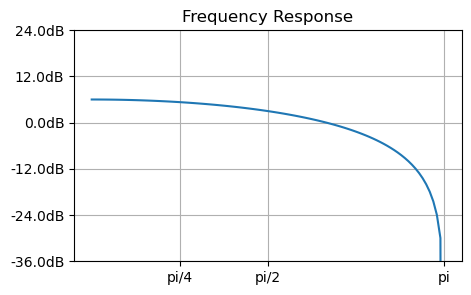

In [97]:
# Define zeros in the z-plane
zeros = [(-1,0)]

# Calculate frequency response
angles, distances = get_frequency_response(zeros)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))

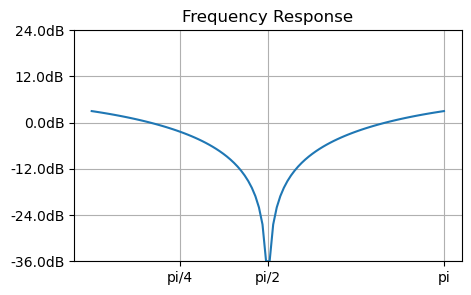

In [98]:
# Define zeros in the z-plane
zeros = [(0,1)]

# Calculate frequency response
angles, distances = get_frequency_response(zeros)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))

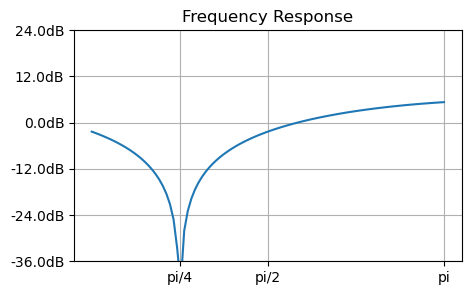

In [99]:
# Define zeros in the z-plane
zeros = [(0.707,0.707)]

# Calculate frequency response
angles, distances = get_frequency_response(zeros)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))

### Second Order Feed-Forward Filter

Transfer function:

$y(n) = a_0 x(n) + a_1 x(n-1) + a_2 x(n-2)$

Apply the $z$ transform

$Y(z) = a_0 X(z) + a_1 X(z) z^{-1} + a_2 X(z) z^{-2}$

$H(z) = \frac{Y(z)}{X(z)} = a_0 + a_1 z^{-1} + a_2 z^{-2}$

$H(z) = a_0  \big(1 + \frac{a_1}{a_0} z^{-1} + \frac{a_2}{a_0} z^{-2}\big)$

$\text{Let: } \alpha_1 = \frac{a_1}{a_0}$

$\text{Let: } \alpha_2 = \frac{a_2}{a_0}$

$ H(z) = a_0 \big[1 + \alpha_1 z ^{-1} + \alpha_2 z^{-2}\big]$


### Examples

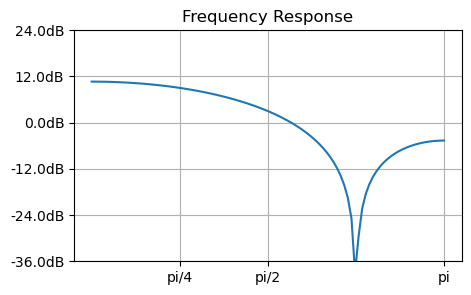

In [100]:
# Define zeros in the z-plane
zeros = [(-0.707,0.707), (-0.707,-0.707)]

# Calculate frequency response
angles, distances = get_frequency_response(zeros)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))

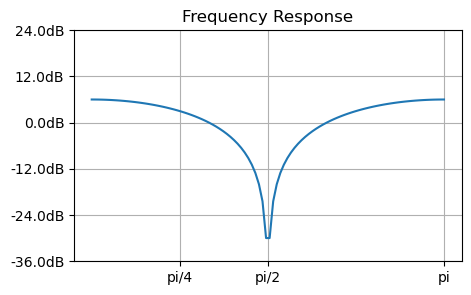

In [101]:
# Define zeros in the z-plane
zeros = [(0,1), (0,-1)]

# Calculate frequency response
angles, distances = get_frequency_response(zeros)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))

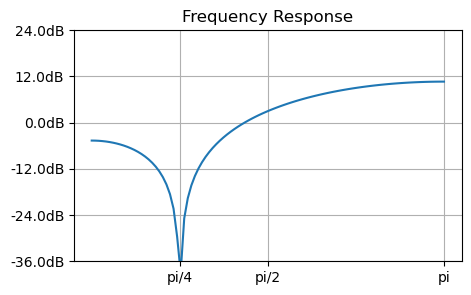

In [102]:
# Define zeros in the z-plane
zeros = [(0.707,0.707), (0.707,-0.707)]

# Calculate frequency response
angles, distances = get_frequency_response(zeros)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))

### Biquad

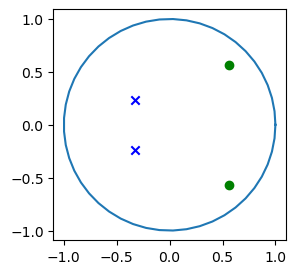

In [103]:
zeros_polar = [(0.8, np.pi/4), (0.8, -np.pi/4)]
poles_polar = [(0.4, np.pi*0.8), (0.4, -np.pi*0.8)]

zeros_cartesian = polar_to_cartesian(zeros_polar)
poles_cartesian = polar_to_cartesian(poles_polar)

plot_z_plane(zeros_cartesian, poles_cartesian)

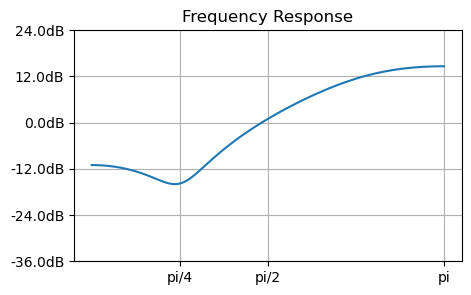

In [104]:
# Calculate frequency response
angles, distances = get_frequency_response(zeros_cartesian, poles_cartesian)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))

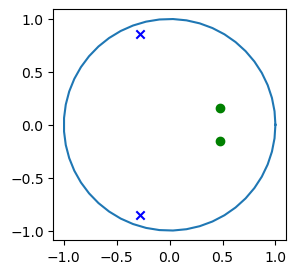

In [116]:
zeros_polar = [(0.5, np.pi*0.1), (0.5, -np.pi*0.1)]
poles_polar = [(0.9, np.pi*0.6), (0.9, -np.pi*0.6)]

zeros_cartesian = polar_to_cartesian(zeros_polar)
poles_cartesian = polar_to_cartesian(poles_polar)

plot_z_plane(zeros_cartesian, poles_cartesian)

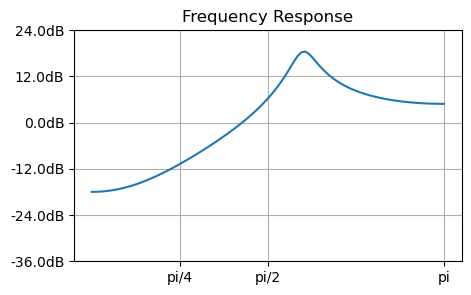

In [117]:
# Calculate frequency response
angles, distances = get_frequency_response(zeros_cartesian, poles_cartesian)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))

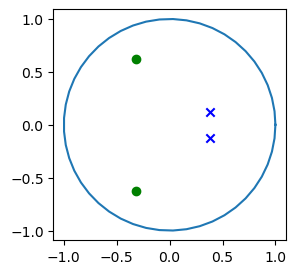

In [118]:
zeros_polar = [(0.7, np.pi*0.65), (0.7, -np.pi*0.65)]
poles_polar = [(0.4, np.pi*0.1), (0.4, -np.pi*0.1)]

zeros_cartesian = polar_to_cartesian(zeros_polar)
poles_cartesian = polar_to_cartesian(poles_polar)

plot_z_plane(zeros_cartesian, poles_cartesian)

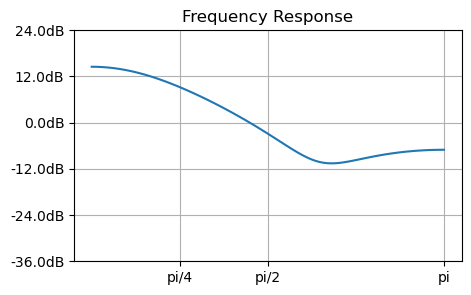

In [119]:
# Calculate frequency response
angles, distances = get_frequency_response(zeros_cartesian, poles_cartesian)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))

### From Coefficients

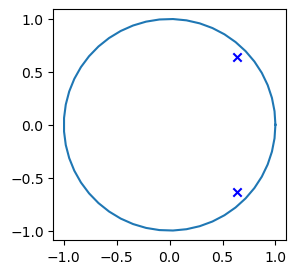

In [120]:
zeros = []

poles_comp = np.roots([1,-1.27,0.81])
poles = [[f.real, f.imag] for f in poles_comp]

plot_z_plane(zeros, poles)

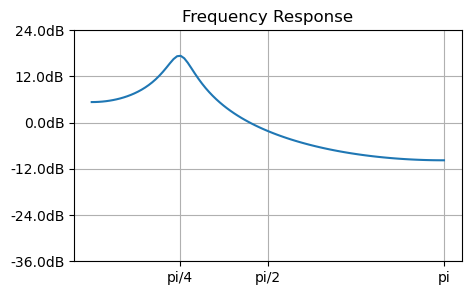

In [121]:
# Calculate frequency response
angles, distances = get_frequency_response(zeros, poles)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))

### Pole at -1 + 0j

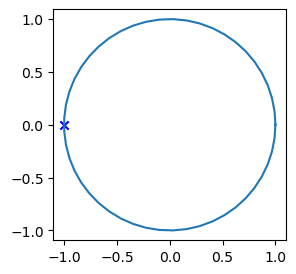

In [122]:
zeros = []
poles = [[-1, 0]]

plot_z_plane(zeros, poles)

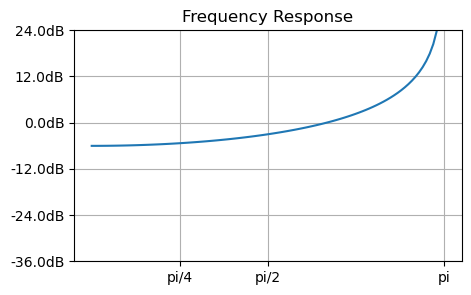

In [123]:
# Calculate frequency response
angles, distances = get_frequency_response(zeros, poles)
    
# Plot results
plot_freq_response(angles,20*np.log10(distances))